Deskripsi CRISP DM

In [ ]:
1. Bussiness Understanding
Pendidikan adalah hal sangat penting, 
maka estimasi ini dibuat untuk calon mahasiswa yang ingin melanjutkan pascasarjana 
Data ini  memiliki berbagai pengaruh dalam penilaian / skor untuk menghitung
berapa jumlah peluang masuknya ke universitas selanjutnya.

Data ini didapatkan yang bertujuan untuk membantu mahasiswa dalam memilih universitas. 
Maka dibuatlah prediksi estimasi peluang penerimaan mahasiswa.
Data ini diambil dari kaggle "https://www.kaggle.com/datasets/mohansacharya/graduate-admissions"

2. Data Understanding

data ini berisi parameter :
1. Skor GRE 
2. Skor TOEFL 
3. Peringkat Universitas 
4. Pernyataan Tujuan dan Kekuatan Surat Rekomendasi
5. IPK Sarjana
6. Pengalaman Penelitian 
7. Peluang Penerimaan 



berikut beserta tipe data nya :

 0   Serial No.        400 non-null    int64  
 1   GREScore          400 non-null    int64  
 2   TOEFLScore        400 non-null    int64  
 3   UniversityRating  400 non-null    int64  
 4   SOP               400 non-null    float64
 5   LOR               400 non-null    float64
 6   CGPA              400 non-null    float64
 7   Research          400 non-null    int64  
 8   ChanceofAdmit     400 non-null    float64
Terdapat int sebanyak 5, float sebanyak 4

3. Data Preparation

Pada tahap ini ditentukan x dan y
x : GREScore,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
y : Chance of Admit

4. Modelling
Memakai model algoritma regresion linear

5. Evaluasi
Setealah tahap modelling, lalu dapat mengetahui prediksi dan tingkat akurasi,lalu mempuat contoh inputan sesuai data.

6. Deployment
Setelah semua tahap berhasil, lalu di import model nya melalui pickle dan di buat streamlit.


# deskripsi library yang digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memanggil Dataset

In [2]:
df = pd.read_csv('Admission.csv')

# Deskripsi Dataset

In [3]:
df.head()

,Serial No.,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Serial No.        400 non-null    int64  
 1   GREScore          400 non-null    int64  
 2   TOEFLScore        400 non-null    int64  
 3   UniversityRating  400 non-null    int64  
 4   SOP               400 non-null    float64
 5   LOR               400 non-null    float64
 6   CGPA              400 non-null    float64
 7   Research          400 non-null    int64  
 8   ChanceofAdmit     400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


<Axes: >

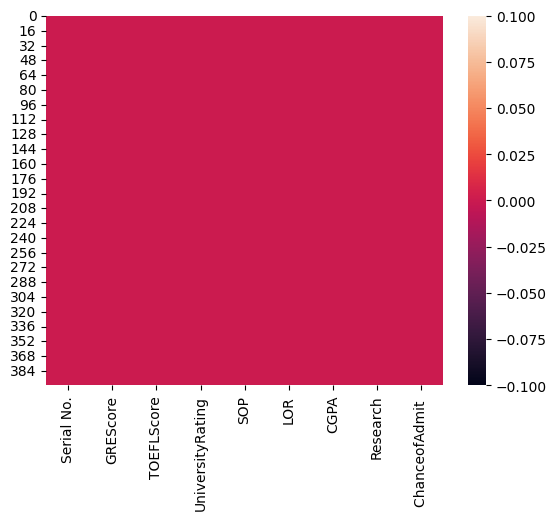

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.describe()

,Serial No.,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# Visualisasi Data

<Axes: >

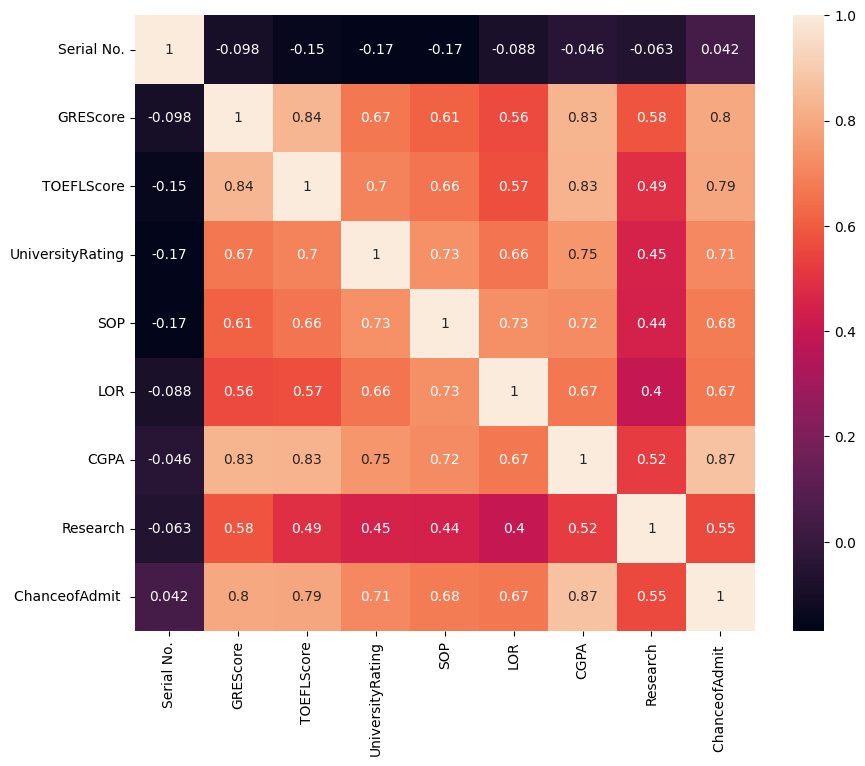

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# distribusi Peringkat Universitas

C:\Users\Nurthariqa\AppData\Local\Temp\ipykernel_4584\1291905303.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['UniversityRating'])


<Axes: xlabel='UniversityRating', ylabel='Density'>

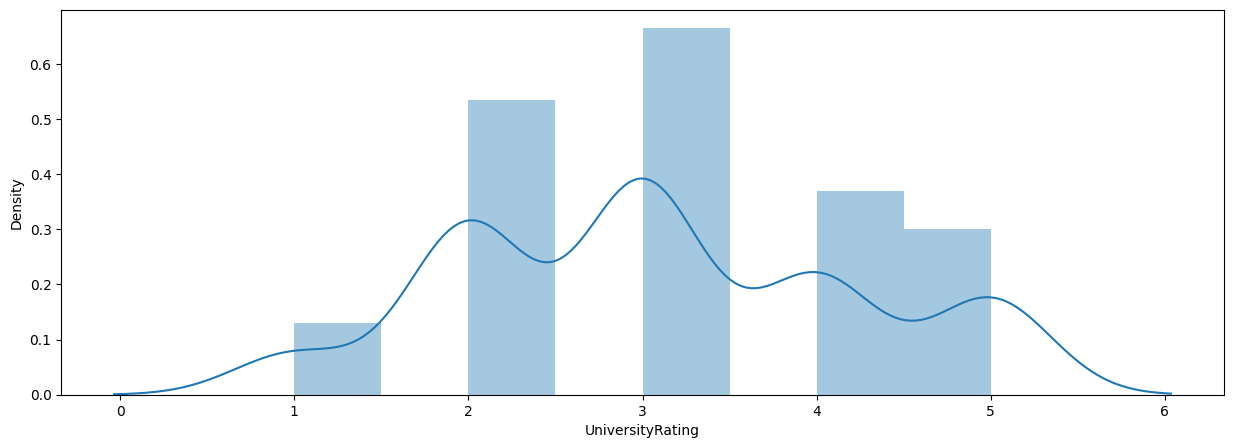

In [8]:
plt.figure(figsize=(15,5))
sns.distplot(df['UniversityRating'])

# distribusi Jumlah Peluang Penerimaan

C:\Users\Nurthariqa\AppData\Local\Temp\ipykernel_4584\4147714971.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ChanceofAdmit '])


<Axes: xlabel='ChanceofAdmit ', ylabel='Density'>

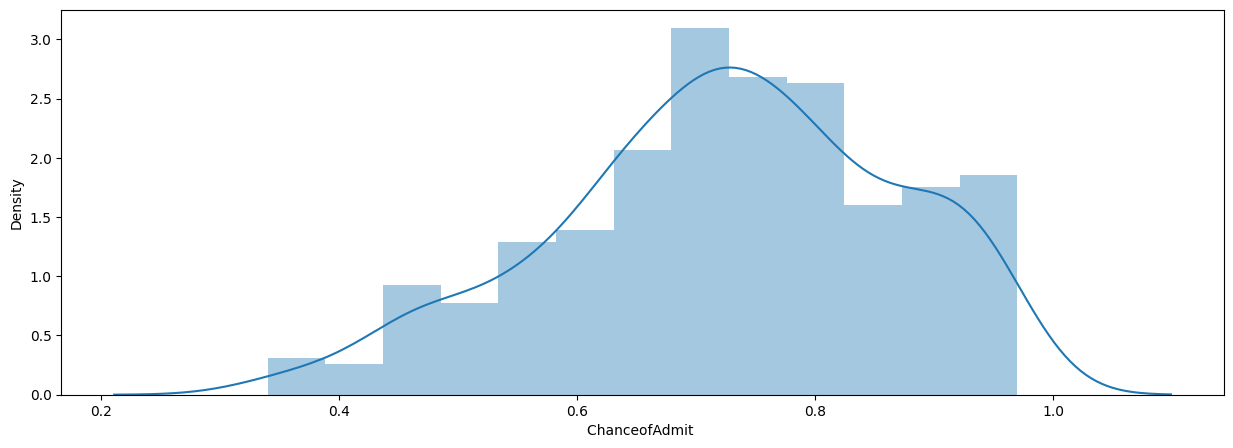

In [10]:
plt.figure(figsize=(15,5))
sns.distplot(df['ChanceofAdmit '])

# seleksi fitur

In [11]:
features = ['GREScore','TOEFLScore','UniversityRating','SOP','LOR','CGPA','Research']
x = df[features]
y = df['ChanceofAdmit ']
x.shape, y.shape

((400, 7), (400,))

# split data training dan data testing

In [12]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(100,)

# membuat model regresi linier

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [14]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.8215518373333373


# membuat inputan model regresi linier

In [15]:
input_data = np.array([[337,118,4,4.5,4.5,9.65,1]])


prediction = lr.predict(input_data) 
print('Estimasi Jumlah Peluang Penerimaan :', prediction)

Estimasi Jumlah Peluang Penerimaan : [0.95750348]


c:\Users\Nurthariqa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# save model

In [16]:
import pickle

filename = 'estimasi_graduate.sav'
pickle.dump(lr,open(filename,'wb'))